In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters
%matplotlib inline

import hphc

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
outdir = 'outdir_new_model'
label = 'create_your_own_source_model'
sampling_frequency = 1024.
duration = 4.

In [86]:
# Here we define our source model - this is the sine-Gaussian model in the
# frequency domain.
def eccentric_waveform(frequency_array, mass_1, mass_2, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    N = len(frequency_array)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j
    
    fmin = 10.0
    fmax = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    
    k = 0
    for f in frequency_array:
        if f>=fmin and f<=fmax:        
            arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , 'm1_':mass_1, 'm2_':mass_2, 'f_':f, 'f0_':10., 'Fp_':1., 'Fc_':0., 'et0_':eccentricity, 'phic_':phase, 'tc_':geocent_time}

            arg_cross = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , 'm1_':mass_1, 'm2_':mass_2, 'f_':f, 'f0_':10., 'Fp_':0., 'Fc_':1., 'et0_':eccentricity, 'phic_':phase, 'tc_':geocent_time}

            fplus = hphc.Fn(**arg_plus)
            h_plus[k] = fplus.htilde()

            fcross = hphc.Fn(**arg_cross)
            h_cross[k] = fcross.htilde()
            
            k = k+1

    return {'plus': h_plus, 'cross': h_cross}

In [4]:
#eccentric_waveform

In [4]:
#arg_plus = {'iota_':np.pi/3, 'beta_':np.pi/3, 'D_':100. , 'm1_':10., 'm2_':10., 'f_':0., 'f0_':10., 'Fp_':1.0, 'Fc_':0.0, 'et0_':0.1, 'phic_':0., 'tc_':0.}
#fplus = hphc.Fn(**arg_plus)
#fplus.eccn()

In [68]:
import time

In [90]:
del start

In [91]:
del end

In [89]:
frequency = np.arange(10,10000,1)

start = time.time()

data = eccentric_waveform(frequency, 35.0 ,30.0 , 0.1, 440.0, 0.4, 0.1, 1.2, 1180002601.0, 1.375, -1.2108)

end = time.time()
print(end - start)

0.17029428482055664


In [54]:
start

1605800602.2535973

In [55]:
end

1605800602.7687528

In [92]:
start = time.time()

data = bilby.gw.source.lal_eccentric_binary_black_hole_no_spins(frequency, mass_1=35.0, mass_2=30.0, eccentricity=0.1, luminosity_distance=440.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=1.375, dec=-1.2108)

end = time.time()
print(end - start)

0.05675005912780762


In [93]:
0.17029428482055664/0.05675005912780762

3.0007772227520406

In [6]:
#plt.loglog(frequency, abs(hp_))

In [94]:
# Set up a random seed for result reproducibility.
np.random.seed(150914)

In [95]:
# We now define some parameters that we will inject
injection_parameters = dict(mass_1=35.0, mass_2=30.0, eccentricity=0.1, luminosity_distance=440.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=1.375, dec=-1.2108)

In [96]:
#waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',reference_frequency=50., minimum_frequency=10., catch_waveform_errors=True)

# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform,
    parameters=injection_parameters)

21:37 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [97]:
# Set up interferometers.
minimum_frequency = 10.0+5.0
maximum_frequency = (C**3)/( G*(35.0+30.0)*Mo*np.pi*6**(3/2) )-5.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
21:37 bilby INFO    : Injected signal in H1:
21:37 bilby INFO    :   optimal SNR = 44.36
21:37 bilby INFO    :   matched filter SNR = 44.97-0.06j
21:37 bilby INFO    :   mass_1 = 35.0
21:37 bilby INFO    :   mass_2 = 30.0
21:37 bilby INFO    :   eccentricity = 0.1
21:37 bilby INFO    :   luminosity_distance = 440.0
21:37 bilby INFO    :   theta_jn = 0.4
21:37 bilby INFO    :   psi = 0.1
21:37 bilby INFO    :   phase = 1.2
21:37 bilby INFO    :   geocent_time = 1180002601.0
21:37 bilby INFO    :   ra = 1.375
21:37 bilby INFO    :   dec = -1.2108
21:37 bilby INFO    : Injected signal in L1:
21:37 bilby INFO    :   optimal SNR = 35.06
21:37 bilby INFO    :   matched filter SNR = 34.97+0.73j
21:37 bilby INFO    :   mass_1 = 

[{'plus': array([-1.23874569e-22-1.93079479e-22j,
         -1.48525345e-22-8.70165039e-23j,
         -1.40003894e-23-1.36055167e-22j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j]),
  'cross': array([1.93050423e-22-1.23844425e-22j,
         8.69795680e-23-1.48505700e-22j,
         1.36017383e-22-1.39979118e-23j, ...,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': array([-1.23874569e-22-1.93079479e-22j,
         -1.48525345e-22-8.70165039e-23j,
         -1.40003894e-23-1.36055167e-22j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j]),
  'cross': array([1.93050423e-22-1.23844425e-22j,
         8.69795680e-23-1.48505700e-22j,
         1.36017383e-22-1.39979118e-23j, ...,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0

21:37 bilby INFO    : Injected signal in H1:
21:37 bilby INFO    :   optimal SNR = 44.36
21:37 bilby INFO    :   matched filter SNR = 89.33-0.06j
21:37 bilby INFO    :   mass_1 = 35.0
21:37 bilby INFO    :   mass_2 = 30.0
21:37 bilby INFO    :   eccentricity = 0.1
21:37 bilby INFO    :   luminosity_distance = 440.0
21:37 bilby INFO    :   theta_jn = 0.4
21:37 bilby INFO    :   psi = 0.1
21:37 bilby INFO    :   phase = 1.2
21:37 bilby INFO    :   geocent_time = 1180002601.0
21:37 bilby INFO    :   ra = 1.375
21:37 bilby INFO    :   dec = -1.2108
21:37 bilby INFO    : Injected signal in L1:
21:37 bilby INFO    :   optimal SNR = 35.06
21:37 bilby INFO    :   matched filter SNR = 70.03+0.73j
21:37 bilby INFO    :   mass_1 = 35.0
21:37 bilby INFO    :   mass_2 = 30.0
21:37 bilby INFO    :   eccentricity = 0.1
21:37 bilby INFO    :   luminosity_distance = 440.0
21:37 bilby INFO    :   theta_jn = 0.4
21:37 bilby INFO    :   psi = 0.1
21:37 bilby INFO    :   phase = 1.2
21:37 bilby INFO    :  

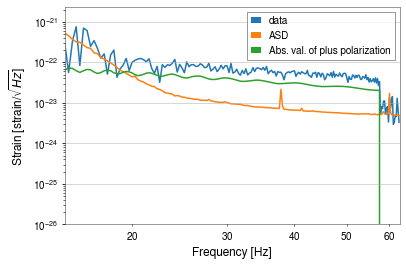

In [98]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [99]:
#injection_parameters = dict(mass_1=35.0, mass_2=30.0, eccentricity=0.1, luminosity_distance=440.0, 
#theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=1.375, dec=-1.2108)
priors = bilby.core.prior.PriorDict()
priors["mass_1"] = 35.
priors["mass_2"] = 30.
priors["eccentricity"] = bilby.core.prior.LogUniform(
    name='eccentricity', latex_label='$e$', minimum=0.01, maximum=0.4)
priors["luminosity_distance"] = 440.
priors["theta_jn"] = 0.4
priors["psi"] = 0.1
priors["phase"] = 1.2
priors["geocent_time"] = 1180002601.0
priors["ra"] = 1.375
priors["dec"] = -1.2108


In [100]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

In [101]:
result_short = bilby.run_sampler(
    likelihood, priors, sampler='dynesty', outdir='short', label="eccentric_test",
    nlive=500, dlogz=3,  # <- Arguments are used to make things fast - not recommended for general use
    clean=True
)


21:38 bilby INFO    : Running for label 'eccentric_test', output will be saved to 'short'
21:38 bilby INFO    : Using lal version 7.0.0
21:38 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
21:38 bilby INFO    : Using lalsimulation version 2.2.0
21:38 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
21:38 bilby INFO    : Search parameters:
21:38 bilby INFO    :   eccentricity = LogUniform(minimum=0.01, maximum=0.4, name='eccentricity', latex_label='$e$', unit=None, boundary=None)
21:38 bilby INFO    :   mass_1 = 35.0
21:38 bilby INFO    :   mass_2 = 30.0
21:38 bilby INFO    :   luminosity_distance = 440.0
21:38 bilby INFO    :   theta_jn = 0.4
21:38 bilby INFO    :   psi = 0.1
21:38 bilby INFO 

0it [00:00, ?it/s]

21:39 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f55f546b5c0>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
21:39 bilby INFO    : Checkpoint every check_point_delta_t = 600s
21:39 bilby INFO    : Using dynesty version 1.0.1
21:39 bilby INFO    : Generating initial points from the prior

541it [12:36,  2.28s/it, bound:0 nc: 11 ncall:1.5e+03 eff:36.0% logz-ratio=4815.47+/-0.07 dlogz:3.658>3] 

21:52 bilby INFO    : Written checkpoint file short/eccentric_test_resume.pickle
21:52 bilby INFO    : Writing 278 current samples to short/eccentric_test_samples.dat
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
21:52 bilby WARNING : Axis limits cannot be NaN or Inf
21:52 bilby WARNING : Failed to create dynesty run plot at checkpoint


617it [15:03,  1.30s/it, bound:0 nc:  2 ncall:1.8e+03 eff:34.6% logz-ratio=4816.00+/-0.08 dlogz:3.001>3]

21:54 bilby INFO    : Written checkpoint file short/eccentric_test_resume.pickle
21:54 bilby INFO    : Writing 316 current samples to short/eccentric_test_samples.dat
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
21:54 bilby WARNING : Axis limits cannot be NaN or Inf
21:54 bilby WARNING : Failed to create dynesty run plot at checkpoint


617it [15:06,  1.47s/it, bound:0 nc:  1 ncall:1.8e+03 eff:62.7% logz-ratio=4818.51+/-nan dlogz:0.003>3] 

21:54 bilby INFO    : Sampling time: 0:10:52.162480


21:54 bilby INFO    : Summary of results:
nsamples: 1117
ln_noise_evidence: -6820.404
ln_evidence: -2001.889 +/-    nan
ln_bayes_factor: 4818.515 +/-    nan



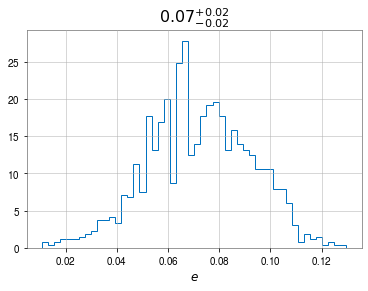

In [102]:
result_short.plot_corner()

In [17]:
len(result_short.samples)

1779